In [1]:
import importlib
import pandas as pd
import numpy as np
import koopomics as ko
importlib.reload(ko)


<module 'koopomics' from '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/koopomics/__init__.py'>

In [2]:
print(dir(ko))


['BandedKoopmanMatrix', 'DataLoader', 'Dataset', 'DiffeomMap', 'F', 'FFLinearizer', 'FF_AE', 'InvKoop', 'Koop', 'KoopmanModel', 'LinearizingKoop', 'TimeSeriesDataset', 'Variable', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'build_nn_functions', 'clear_output', 'collate_fn', 'data_loader', 'data_prep', 'dataloader_AE', 'embeddingANN', 'get_dynamic_targets', 'get_validation_targets', 'koopmanANN', 'lr_scheduler', 'model', 'model_loader', 'nn', 'np', 'optim', 'pd', 'plt', 'test', 'test_utils', 'torch', 'train', 'train_utils', 'training', 'update_batch_loss_plot', 'update_batch_loss_subplots']


In [3]:
embedding = ko.FF_AE([264,1000,1000,20],[20,1000,1000,264])

linearizer = ko.FFLinearizer([20, 1000, 20], [20, 1000, 20])
koop = ko.InvKoop(latent_dim=20)
operator = ko.LinearizingKoop(linearizer=linearizer,koop = koop)
TestingKoop2 = ko.KoopmanModel(embedding=embedding,operator=operator)

Model loaded with:
FF_AE module
LinearizingKoop module
An invertible Koop


In [4]:
pregnancy_df = pd.read_csv('/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/input_data/pregnancy/pregnancy_interpolated_normalized.csv')

sample_id = 'Subject ID'
time_id = 'Gestational age (GA)/weeks'
feature_list = pregnancy_df.columns[6:]

train_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Discovery'].copy()
test_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Validation (Test Set 1)'].copy()
train_dataloader = ko.dataloader_AE(train_set_df, feature_list, sample_id=sample_id, time_id=time_id, batch_size=5)
test_dataloader = ko.dataloader_AE(test_set_df, feature_list, sample_id=sample_id, time_id=time_id, batch_size=5)


In [5]:
embedding_model = ko.FF_AE([264,100,100,20], [20,100,100,264])
operator_model = ko.LinearizingKoop(linearizer=ko.FFLinearizer([20,30,40], [40,30,20]), koop=ko.InvKoop(latent_dim=40))

TestingKoop = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)


Model loaded with:
FF_AE module
LinearizingKoop module
An invertible Koop


In [6]:
embedding_model = ko.FF_AE([264,100,100,100,100,20], [20,100,100,100,100,264])
operator_model = ko.LinearizingKoop(linearizer=ko.FFLinearizer([20,30,30,30,40], [40,30,30,30,20]), koop=ko.InvKoop(latent_dim=40))

TestingKoop3 = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)


Model loaded with:
FF_AE module
LinearizingKoop module
An invertible Koop


In [7]:
loss_dict = ko.test(TestingKoop3, train_dataloader, max_Kstep=10)

In [8]:
loss_dict

{'test_fwd_loss': 6.015547906784784,
 'test_bwd_loss': 5.958318437848773,
 'test_temp_cons_loss': 1.1788696101500618e-11,
 'test_inv_cons_loss': 84705.2280960083,
 'dict_fwd_step_loss': {1: 6.115826016380673,
  2: 6.121591454460507,
  3: 6.124351501464844,
  4: 6.128757204328265,
  5: 6.139280954996745,
  6: 6.122883456093924,
  7: 5.84774280729748,
  8: 5.837500435965402,
  9: 5.861321063268752,
  10: 5.856224173591251},
 'dict_fwd_step_tempcons_loss': {(1, 2): 1.970820520256185e-11,
  (2, 3): 2.084202856134241e-15,
  (3, 4): 1.7173936876378442e-17,
  (4, 5): 1.7194288906948804e-17,
  (5, 6): 1.6739568029451916e-17,
  (6, 7): 1.564868089837218e-17,
  (7, 8): 1.5716218422857253e-17,
  (8, 9): 1.5529550779837376e-17,
  (9, 10): 1.5754876708784918e-17},
 'dict_bwd_step_loss': {1: 6.109720207396007,
  2: 6.091198671431768,
  3: 6.087095510391962,
  4: 6.083523182641892,
  5: 6.080625352405367,
  6: 6.0708103861127585,
  7: 5.774963492438907,
  8: 5.759644008818126,
  9: 5.764473006838844,

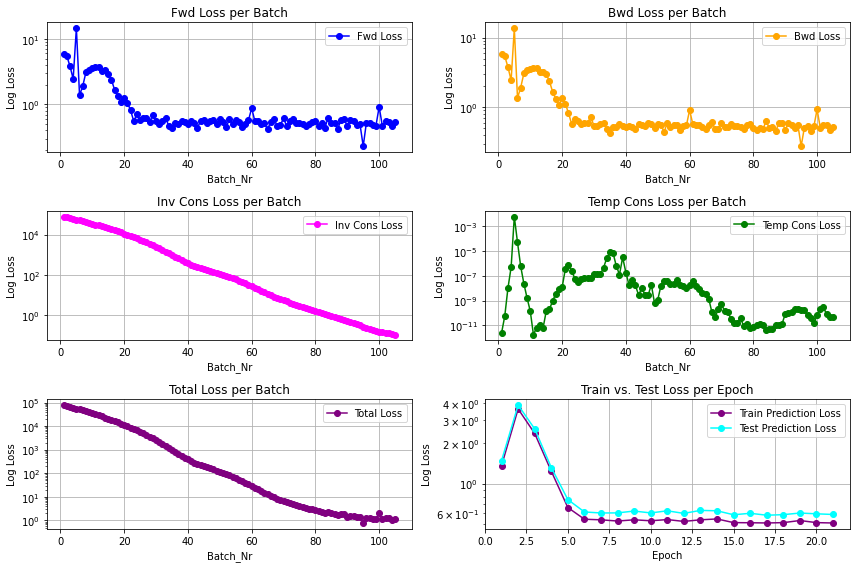

----------Training epoch--------
----------------21---------------

---------------Batch Nr. 106-------------------
Total Loss: 1.043805718421936
FwdLoss: 0.46464696526527405
BwdLoss: 0.4755817651748657
Inv_Cons_Loss: 0.10357699543237686
Temp_Cons_Loss: 4.675192871728129e-11
---------------Batch Nr. 107-------------------
Total Loss: 1.2762986421585083
FwdLoss: 0.579125165939331
BwdLoss: 0.6025485992431641
Inv_Cons_Loss: 0.09462489932775497
Temp_Cons_Loss: 4.4285592554205166e-11
---------------Batch Nr. 108-------------------
Total Loss: 1.138810157775879
FwdLoss: 0.5169328451156616
BwdLoss: 0.5358848571777344
Inv_Cons_Loss: 0.0859924703836441
Temp_Cons_Loss: 3.899496003878511e-11
---------------Batch Nr. 109-------------------
Total Loss: 1.042988896369934
FwdLoss: 0.4625508487224579
BwdLoss: 0.5020846724510193
Inv_Cons_Loss: 0.07835343480110168
Temp_Cons_Loss: 4.402908593270638e-11
---------------Batch Nr. 110-------------------
Total Loss: 1.204384207725525
FwdLoss: 0.57032769918441

In [ ]:

# Run training loop
ko.train(TestingKoop3, train_dataloader, test_dataloader, lr= 0.01, learning_rate_change=0.8, num_epochs=200, max_Kstep=15, weight_decay=0.01, model_name='TestingKoop3')


In [10]:
import torch
torch.save(TestingKoop.state_dict(), 'TestingKoop3.pth')